<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# mms = MinMaxScaler()
mms = StandardScaler()   
import numpy as np
import statsmodels.api as sm

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [4]:
# Load the data
df = pd.read_csv('./housing.csv')

# Let's have a look at the dataset.

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print df.shape

(1460, 81)


In [7]:
cols = df.columns

In [8]:
print df.isnull().sum() # Any null values?

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
df.describe(include = [np.number]) # describe metric datas only

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.describe(include = ['O'])  # describle categorical columns only

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# How about the SalePrice ?

In [11]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Let's see sales price over the years.

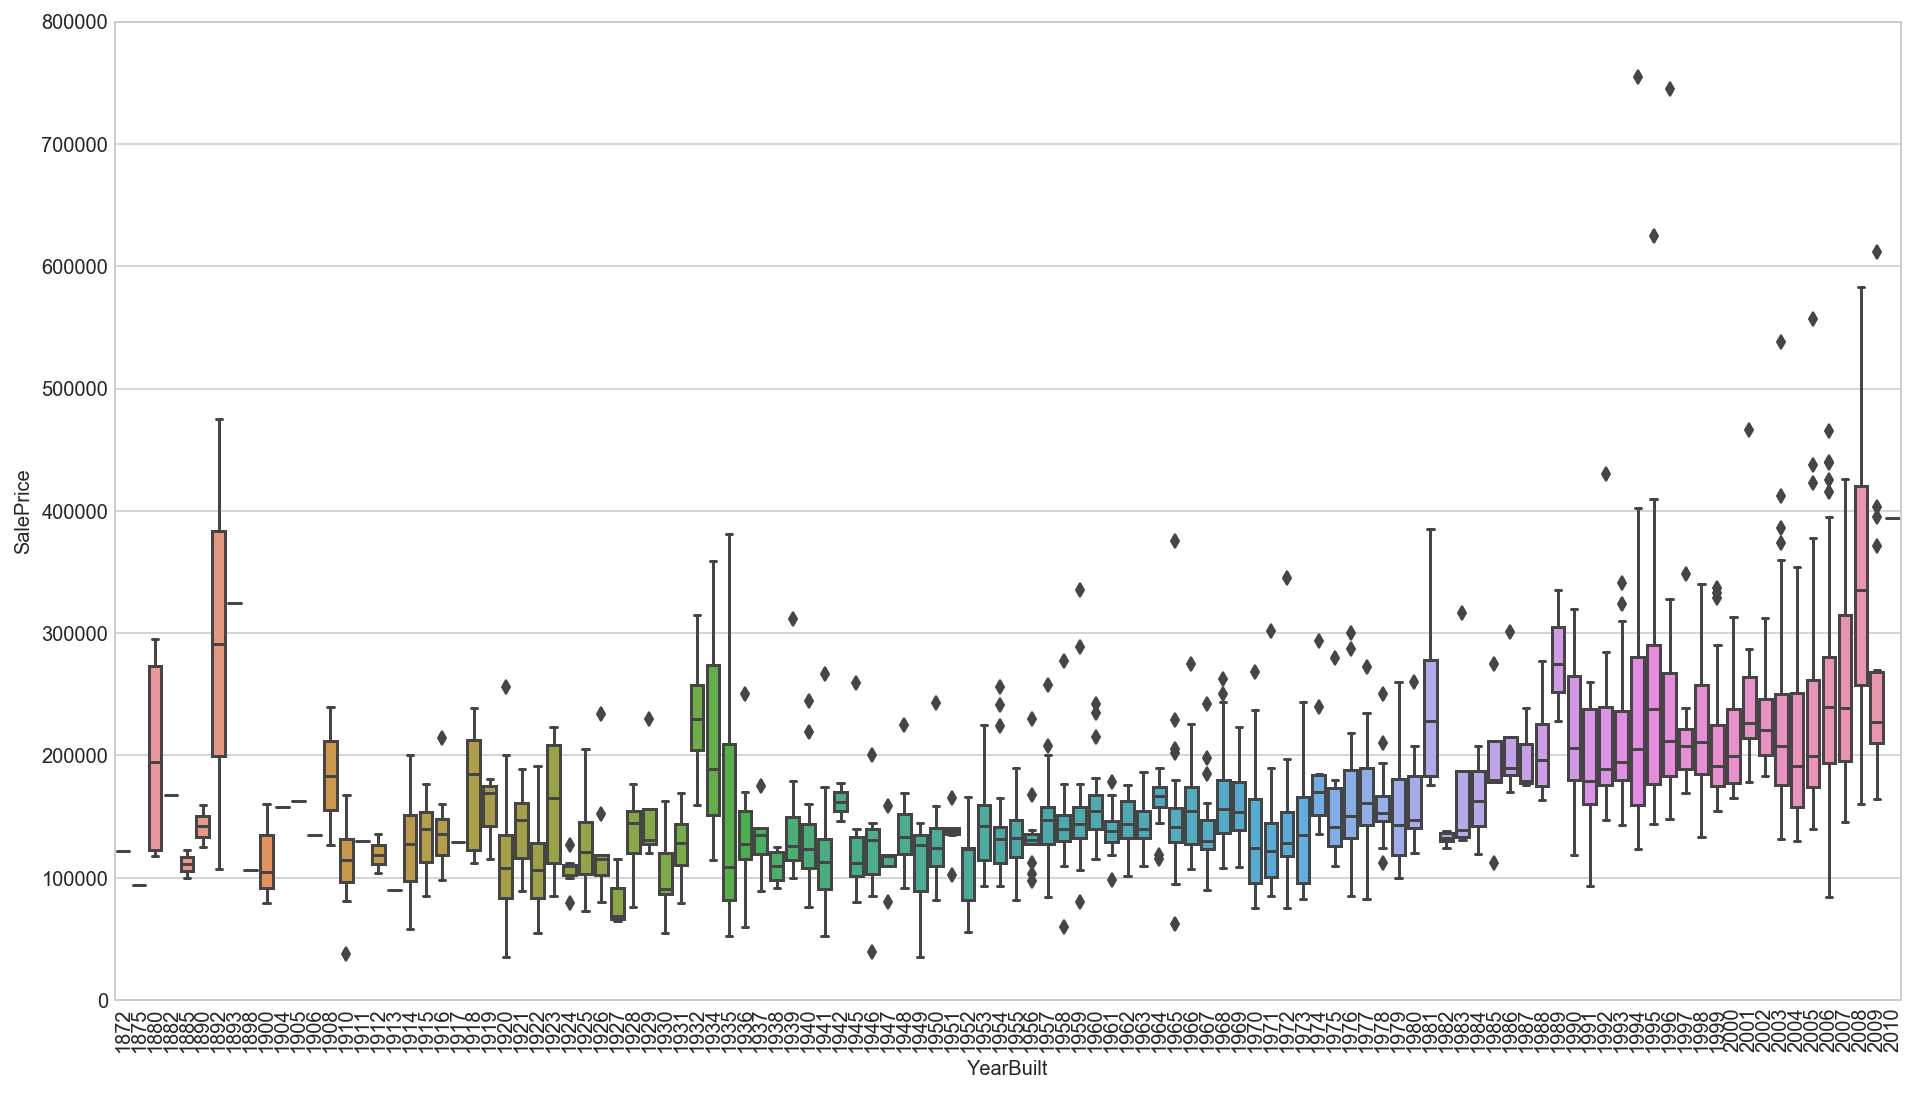

In [12]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 9))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


# Let's start cleaning, Working with Missing Values

In [13]:
df = pd.read_csv('./housing.csv')
df_clean = df   #.select_dtypes(exclude=[object])
print "Before cleaning df_clean.shape = " , df_clean.shape

# # Drop columns with 80% null values
# thresh = len(df_numeric) * 0.2                                  
# df_clean.dropna(thresh = thresh, axis = 1, inplace = True)  

df_clean.loc[df_clean["LotFrontage"].isnull(), "LotFrontage"] = 0

# Replace Null values with SOMETHING
df_clean.BsmtQual.replace(np.nan, 'NOBsm', regex=True, inplace=True)         
df_clean.BsmtCond.replace(np.nan, 'NOBsm', regex=True, inplace=True)
df_clean.BsmtExposure.replace(np.nan, 'NOBsm', regex=True, inplace=True)
df_clean.BsmtFinType1.replace(np.nan, 'NOBsm', regex=True, inplace=True)
df_clean.BsmtFinType2.replace(np.nan, 'NOBsm', regex=True, inplace=True)

df_clean.GarageType.replace(np.nan, 'NOGarg', regex=True, inplace=True)
df_clean.GarageFinish.replace(np.nan, 'NOGarg', regex=True, inplace=True)
df_clean.GarageQual.replace(np.nan, 'NOGarg', regex=True, inplace=True)
df_clean.GarageCond.replace(np.nan, 'NOGarg', regex=True, inplace=True)

df_clean.MasVnrType.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.Electrical.replace(np.nan, 'SBrkr', regex=True, inplace=True) #SBrkr 'None' has more.


df_clean.RoofStyle.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.RoofMatl.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.Exterior1st.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.Exterior2nd.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.ExterQual.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.ExterCond.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.Foundation.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.Heating.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.HeatingQC.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.CentralAir.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.Electrical.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.KitchenQual.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.Functional.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.
df_clean.FireplaceQu.replace(np.nan, 'None', regex=True, inplace=True)  #Bcos 'None' has more.


# Fence also too few data, many Nan, replace to binary
df_clean.loc[df_clean["Fence"].notnull(), "Fence"] = 1
df_clean.loc[df_clean["Fence"].isnull(), "Fence"] = 0

# MiscFeature replace to binary
df_clean.loc[df_clean["MiscFeature"].notnull(), "MiscFeature"] = 1
df_clean.loc[df_clean["MiscFeature"].isnull(), "MiscFeature"] = 0

# FireplaceQu replace to binary
df_clean.loc[df_clean["FireplaceQu"].notnull(), "FireplaceQu"] = 1
df_clean.loc[df_clean["FireplaceQu"].isnull(), "FireplaceQu"] = 0

# PoolQC only 7 data,1453 is NaN replace to binary, got pool and no pool
df_clean.loc[df_clean["PoolQC"].notnull(), "PoolQC"] = 1
df_clean.loc[df_clean["PoolQC"].isnull(), "PoolQC"] = 0

df_clean.loc[df_clean["Alley"].notnull(), "Alley"] = 1
df_clean.loc[df_clean["Alley"].isnull(), "Alley"] = 0

# Remove  commercial properties
comm_filter = df_clean["MSZoning"] == "C (all)"
df_clean = df_clean[~comm_filter]
df_clean.reset_index(drop=True)

#Since most common value in the column is None, let's fill the missing values with "None"
df_clean.loc[df_clean["MasVnrType"].isnull(), "MasVnrType"] = 'None'

# Replace Null cells with mean
df_clean.fillna(df_clean.mean(), inplace = True)

# Remove rows with null value.
df_clean.dropna( axis = 0, how='any', inplace = True) 

print "Before cleaning df_clean.shape  = " , df_clean.shape

df = df_clean

Before cleaning df_clean.shape =  (1460, 81)


C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Before cleaning df_clean.shape  =  (1450, 81)


C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Separate by human , renovatable or not_renovatable

In [14]:
all_cols = df.columns

renovatable = ['OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
               'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',  'HeatingQC', 'Electrical',  'LowQualFinSF',
               'KitchenQual', 'Functional','GarageQual', 'GarageCond','SalePrice', 'YrSold'] 
# Removed  'FireplaceQu' ,'PoolQC', 'Fence' during cleaning


not_renovatable = ['MSSubClass', 'LotArea', 'LotFrontage', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                  'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                  'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea',  'Foundation',  'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'Heating', 'CentralAir',  
                   '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',  'BsmtHalfBath', 'FullBath',  'HalfBath', 'BedroomAbvGr', 
                  'KitchenAbvGr'  , 'TotRmsAbvGrd', 'Fireplaces',  'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
                   'GarageArea','PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',  'ScreenPorch', 'PoolArea',
                   'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

#### Create/Split df to its renovatable and NOT renovatable features

In [15]:
# Preparing df for NOT renovateable features
df_notreno = df[not_renovatable]                               # Giving a diff name in case messed up df.
df_cat = df_notreno.select_dtypes(include=[object])            # SPlit cats only
df_numeric = df_notreno.select_dtypes(exclude=[object])        # Splits num only  
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)         #   Dummies all cats
df_notreno = pd.concat([df_numeric , df_cat_dummy],  axis=1)   # Merge back togather numeric with cats
df_train_notreno_b4_2010 = df_notreno[df_notreno.YrSold < 2010] # SPlit df before 2010  NOT renovatable
df_test_notreno_2010 = df_notreno[df_notreno.YrSold == 2010]    # SPlit df after 2010   NOT renovatable
print df_train_notreno_b4_2010.shape
print df_test_notreno_2010.shape

(1278, 155)
(172, 155)


In [16]:
# Preparing df for renovateable features
df_reno = df[renovatable]                               # Giving a diff name in case messed up df.
df_cat = df_reno.select_dtypes(include=[object])            # SPlit cats only
df_numeric = df_reno.select_dtypes(exclude=[object])        # Splits num only  
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)         #   Dummies all cats
df_reno = pd.concat([df_numeric , df_cat_dummy],  axis=1)   # Merge back togather numeric with cats
df_train_reno_b4_2010 = df_reno[df_reno.YrSold < 2010] # SPlit df before 2010 renovatable
df_test_reno_2010 = df_reno[df_reno.YrSold == 2010]    # SPlit df after 2010  renovatable
print df_train_reno_b4_2010.shape
print df_test_reno_2010.shape

(1278, 88)
(172, 88)


#### Create/Split Train/Test sets for renovatable and not renovatable features

In [17]:
# NOT RENOVATABLE + BEFORE 2010, Train set
y_train_notreno_b4_2010 = df_train_notreno_b4_2010[["SalePrice"]].values
X_train_notreno_b4_2010 = df_train_notreno_b4_2010.drop("SalePrice", axis=1).values
Xs_train_notreno_b4_2010 = mms.fit_transform(X_train_notreno_b4_2010)

# NOT RENOVATABLE + AFTER 2010, TEST set
y_test_notreno_2010 = df_test_notreno_2010[["SalePrice"]].values
X_test_notreno_2010 = df_test_notreno_2010.drop("SalePrice", axis=1).values
Xs_test_notreno_2010 = mms.fit_transform(X_test_notreno_2010)

y_train_notreno_b4_2010 = y_train_notreno_b4_2010.flatten(order='C')
y_test_notreno_2010 = y_test_notreno_2010.flatten(order='C')

print y_train_notreno_b4_2010.shape
print Xs_train_notreno_b4_2010.shape
print y_test_notreno_2010.shape
print Xs_test_notreno_2010.shape


(1278L,)
(1278L, 154L)
(172L,)
(172L, 154L)


In [18]:
# RENOVATABLE + BEFORE 2010, Train set
y_train_reno_b4_2010 = df_train_reno_b4_2010[["SalePrice"]].values
X_train_reno_b4_2010 = df_train_reno_b4_2010.drop("SalePrice", axis=1).values
Xs_train_reno_b4_2010 = mms.fit_transform(X_train_reno_b4_2010)

# RENOVATABLE + AFTER 2010, TEST set
y_test_reno_2010 = df_test_reno_2010[["SalePrice"]].values
X_test_reno_2010 = df_test_reno_2010.drop("SalePrice", axis=1).values
Xs_test_reno_2010 = mms.fit_transform(X_test_reno_2010)

y_train_reno_b4_2010 = y_train_reno_b4_2010.flatten(order='C')
y_test_reno_2010 = y_test_reno_2010.flatten(order='C')

print y_train_reno_b4_2010.shape
print Xs_train_reno_b4_2010.shape
print y_test_reno_2010.shape
print Xs_test_reno_2010.shape


(1278L,)
(1278L, 87L)
(172L,)
(172L, 87L)


C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Modeling  NOT RENOVATABLE + BEFORE 2010, Train set

In [19]:
lr_notreno = LinearRegression()
lr_notreno.fit(Xs_train_notreno_b4_2010, y_train_notreno_b4_2010)

lr_lasso_notreno = Lasso(random_state=0, alpha=500) # alpha 0 to 1
lr_lasso_notreno.fit(Xs_train_notreno_b4_2010,y_train_notreno_b4_2010)

lr_ridge_notreno = Ridge(alpha=100)   # alpha 0 to 1
lr_ridge_notreno.fit(Xs_train_notreno_b4_2010,y_train_notreno_b4_2010)

elast_notreno = ElasticNet(alpha=0.1, l1_ratio=0.1)   # alpha 0 to 1
elast_notreno.fit(Xs_train_notreno_b4_2010, y_train_notreno_b4_2010)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
# test Score
print lr_notreno.score(Xs_test_notreno_2010, y_test_notreno_2010) 
print lr_lasso_notreno.score(Xs_test_notreno_2010, y_test_notreno_2010) 
print lr_ridge_notreno.score(Xs_test_notreno_2010, y_test_notreno_2010) 
print elast_notreno.score(Xs_test_notreno_2010, y_test_notreno_2010) 

-1.3684932763406959e+19
0.8789043148787121
0.8805135181884622
0.8808438089692592


#### Surprisingly, the scoring is not bad, around 0.88 for Ridge and ElasticNet. 
#### However, I think there could be overfitting, since there are many features inside Xs.

## Using LassoCV to reduce number of features

In [21]:
X = df_train_notreno_b4_2010.copy().drop(columns='SalePrice')
Xs = mms.fit_transform(X)
y = df_train_notreno_b4_2010.SalePrice.copy()

In [22]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y)
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(Xs, y)
lasso_scores = cross_val_score(lasso, Xs, y, cv=10)
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(20)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

,abs_coef,coef,variable
12,30409.202854,30409.202854,GrLivArea
65,12417.318927,12417.318927,Neighborhood_NridgHt
22,9805.264021,9805.264021,GarageCars
64,7753.000297,7753.000297,Neighborhood_NoRidge
71,6898.367487,6898.367487,Neighborhood_StoneBr
4,6865.755799,6865.755799,YearRemodAdd
0,6296.176710,-6296.176710,MSSubClass
9,5478.991043,5478.991043,TotalBsmtSF
113,5409.293131,5409.293131,BsmtFinType1_GLQ
146,5296.902541,5296.902541,SaleType_New


In [23]:
# Fit regression model
results = sm.OLS(y, Xs).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.180
Date:                Fri, 06 Apr 2018   Prob (F-statistic):             0.0788
Time:                        11:40:14   Log-Likelihood:                -17308.
No. Observations:                1278   AIC:                         3.492e+04
Df Residuals:                    1126   BIC:                         3.570e+04
Df Model:                         152                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4727.1962   2.96e+04     -0.160      0.8

In [24]:
selected_cols = ['BsmtExposure',
'BsmtFinType1',
'Condition2',
'Fireplaces',
'GarageCars',
'GrLivArea',
'KitchenAbvGr',
'MasVnrArea',
'MSSubClass',
'Neighborhood',
'SaleType',
'TotalBsmtSF',
'YearBuilt',
'YearRemodAdd',
'YrSold',
'SalePrice'
]

In [25]:
# Preparing df for NOT renovateable features
df_notreno_new = df[selected_cols]                               # Giving a diff name in case messed up df.
df_cat = df_notreno_new.select_dtypes(include=[object])            # SPlit cats only
df_numeric = df_notreno.select_dtypes(exclude=[object])        # Splits num only  
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)         #   Dummies all cats
df_notreno_new = pd.concat([df_numeric , df_cat_dummy],  axis=1)   # Merge back togather numeric with cats
df_train_notreno_b4_2010_new = df_notreno_new[df_notreno_new.YrSold < 2010] # SPlit df before 2010  NOT renovatable
df_test_notreno_2010_new = df_notreno_new[df_notreno_new.YrSold == 2010]    # SPlit df after 2010   NOT renovatable
print df_train_notreno_b4_2010_new.shape
print df_test_notreno_2010_new.shape

(1278, 204)
(172, 204)


In [26]:
# NOT RENOVATABLE + BEFORE 2010, Train set
y_train_notreno_b4_2010_new = df_train_notreno_b4_2010_new[["SalePrice"]].values
X_train_notreno_b4_2010_new = df_train_notreno_b4_2010_new.drop("SalePrice", axis=1).values
Xs_train_notreno_b4_2010_new = mms.fit_transform(X_train_notreno_b4_2010_new)

# NOT RENOVATABLE + AFTER 2010, TEST set
y_test_notreno_2010_new = df_test_notreno_2010_new[["SalePrice"]].values
X_test_notreno_2010_new = df_test_notreno_2010_new.drop("SalePrice", axis=1).values
Xs_test_notreno_2010_new = mms.fit_transform(X_test_notreno_2010_new)

y_train_notreno_b4_2010_new = y_train_notreno_b4_2010_new.flatten(order='C')
y_test_notreno_2010_new = y_test_notreno_2010_new.flatten(order='C')

print y_train_notreno_b4_2010_new.shape
print Xs_train_notreno_b4_2010_new.shape
print y_test_notreno_2010_new.shape
print Xs_test_notreno_2010_new.shape

(1278L,)
(1278L, 203L)
(172L,)
(172L, 203L)


#### Re-Model using the newly selected features

In [27]:
lr_notreno_new = LinearRegression()
lr_notreno_new.fit(Xs_train_notreno_b4_2010_new, y_train_notreno_b4_2010_new)

lr_lasso_notreno_new = Lasso(random_state=0, alpha=500) # alpha 0 to 1
lr_lasso_notreno_new.fit(Xs_train_notreno_b4_2010_new,y_train_notreno_b4_2010_new)

lr_ridge_notreno_new = Ridge(alpha=100)   # alpha 0 to 1
lr_ridge_notreno_new.fit(Xs_train_notreno_b4_2010_new,y_train_notreno_b4_2010_new)

elast_notreno_new = ElasticNet(alpha=0.1, l1_ratio=0.1)   # alpha 0 to 1
elast_notreno_new.fit(Xs_train_notreno_b4_2010_new, y_train_notreno_b4_2010_new)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# Score , test using 2010 data
print lr_notreno_new.score(Xs_test_notreno_2010_new, y_test_notreno_2010_new) 
print lr_lasso_notreno_new.score(Xs_test_notreno_2010_new, y_test_notreno_2010_new) 
print lr_ridge_notreno_new.score(Xs_test_notreno_2010_new, y_test_notreno_2010_new) 
print elast_notreno_new.score(Xs_test_notreno_2010_new, y_test_notreno_2010_new) 

-4.099587634952585e+21
0.8789059799022367
0.8793101085910252
0.8795358508869839


#### Linear Regression ridge and ElastNet shows better score. Lasso occaionally shows better.

# In fact, using the newly selected features by LassoCV, the score did not get better. Went Down by 0.01. 

#### PLOT Visualization

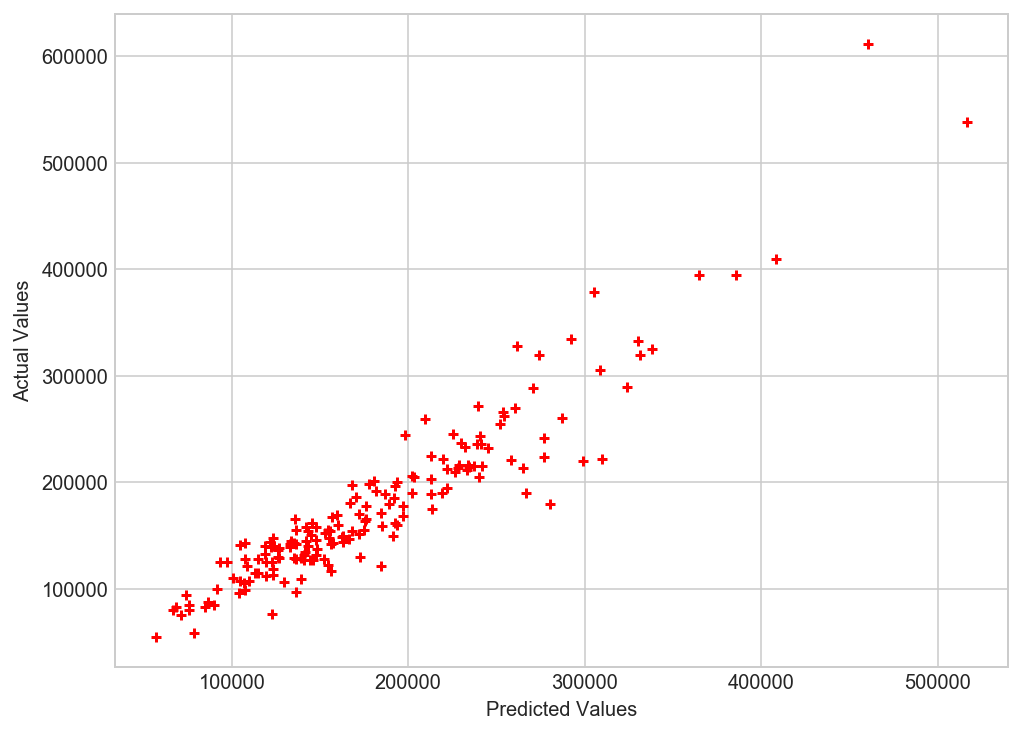

In [29]:
# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(lr_ridge_notreno_new.predict(Xs_test_notreno_2010_new), y_test_notreno_2010_new, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# Conclusion for Q1, the linear model shows good prediction. The plot above is showing there is linearity between Actual SalePrice vs Predicted SalesPrice. Even if we reduced number of features, the score only drop by 0.01. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

# Create a new model for renovatable features

In [30]:
lr_reno_new = LinearRegression()
lr_reno_new.fit(Xs_train_reno_b4_2010, y_train_reno_b4_2010)

lr_lasso_reno_new = Lasso(random_state=0, alpha=0.1) # alpha 0 to 1
lr_lasso_reno_new.fit(Xs_train_reno_b4_2010,y_train_reno_b4_2010)

lr_ridge_reno_new = Ridge(alpha=0.1)   # alpha 0 to 1
lr_ridge_reno_new.fit(Xs_train_reno_b4_2010,y_train_reno_b4_2010)

elast_reno_new = ElasticNet(alpha=0.1, l1_ratio=0.1)   # alpha 0 to 1
elast_reno_new.fit(Xs_train_reno_b4_2010, y_train_reno_b4_2010)

C:\Users\default.LAPTOP-2CI68M4P\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
# Score , test using 2010 data
print lr_reno_new.score(Xs_test_reno_2010, y_test_reno_2010) 
print lr_lasso_reno_new.score(Xs_test_reno_2010, y_test_reno_2010) 
print lr_ridge_reno_new.score(Xs_test_reno_2010, y_test_reno_2010) 
print elast_reno_new.score(Xs_test_reno_2010, y_test_reno_2010) 

-5.395929822576152e+21
0.6469505508460771
0.6472426938174913
0.7031425104097704


#### Linear Regression Lasso model works better for renovatable features

# Evaluate the effect in dollars of the renovate-able features.

##### In order to answer this, I will need to find y_residual, aka Actual SalePrice minus Predicted Saleprice not renovatable feature. 

In [36]:
# Preparing y residual, not renovatable, before 2010 as train set, after 2010 as test set
# y_residual = Actual SalePrice - Predicted SalePrice(not reno)
y_residual_b4_2010_notreno = y_train_notreno_b4_2010_new - lr_lasso_notreno_new.predict(Xs_train_notreno_b4_2010_new)
y_residual_2010_notreno = y_test_notreno_2010_new - lr_lasso_notreno_new.predict(Xs_test_notreno_2010_new)   

y_residual_b4_2010_reno = elast_reno_new.predict(Xs_train_reno_b4_2010) - y_train_reno_b4_2010  # before 2010
y_residual_2010_reno = elast_reno_new.predict(Xs_test_reno_2010) - y_test_reno_2010   # 2010

# preparing X train of all renovatable (before 2010 as train set and after 2010 as test set)
# Xs_test_reno_2010     ===> Commented off bcos this was created previously
# Xs_train_reno_b4_2010 ===> Commented off bcos this was created previously

##### Then use this y_residual to create a new model to predict residual, aka difference in SalePrice.
#####  Meaning I will have a model to predict saleprice residual.....!!!! (diff in sales price )

In [37]:
# X reno and y_residual not reno, to train a model. aka. a residual predictor using renovatable features.
lr_lasso_residual = Lasso(random_state=0, alpha=100) 
lr_lasso_residual.fit(Xs_train_reno_b4_2010,y_residual_b4_2010_notreno)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

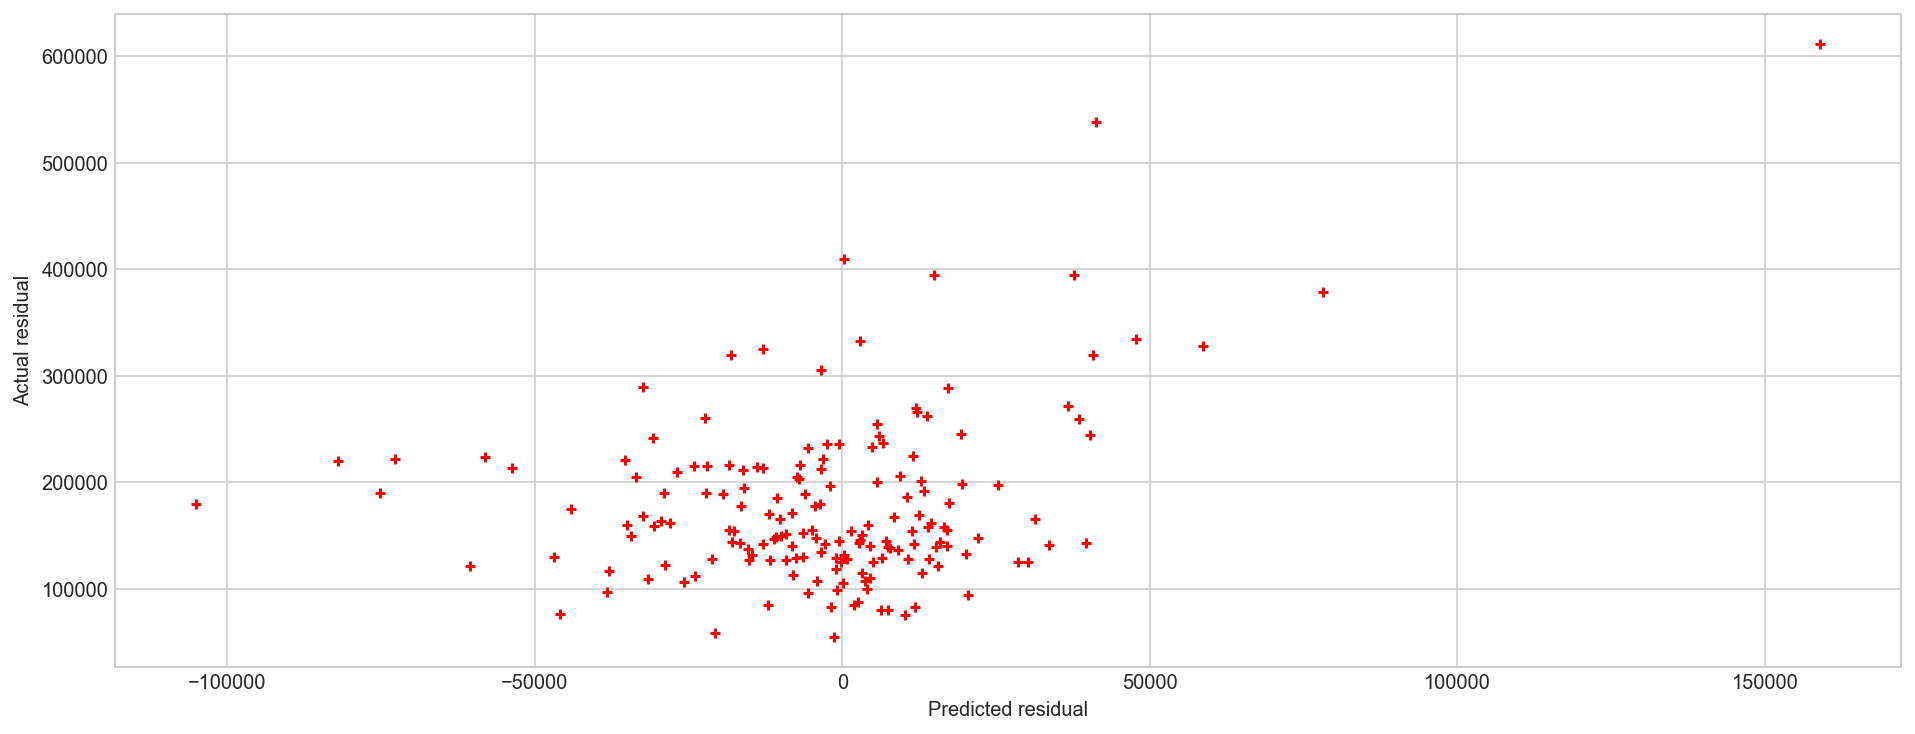

In [39]:
# Plot the actual residual vs predicted residual
plt.figure(figsize=(16,6))
plt.scatter(y_residual_2010_notreno, y_test_notreno_2010_new, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted residual")
plt.ylabel("Actual residual")
plt.show()

In [41]:
print "MSE:", mean_squared_error(y_residual_2010_notreno, y_test_notreno_2010_new)

 MSE: 38645206341.80508


### The plot above evaluate the effect in dollars of the renovate-able features vs not renovateable. 
### The plot also shows how much of the variance in price remaining is explained by the features stated below under lasso_coefs.
### MSE went kaput, probably due to outliers where some houses sold in to extreme high pricing causing the value went meaningless.

In [42]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs_train_reno_b4_2010,y_residual_b4_2010_notreno)
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(Xs, y)
lasso_scores = cross_val_score(lasso, Xs_train_reno_b4_2010,y_residual_b4_2010_notreno, cv=10)
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(20)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

,abs_coef,coef,variable
12,29444.927067,29444.927067,GrLivArea
65,13273.672355,13273.672355,Neighborhood_NridgHt
22,9164.941595,9164.941595,GarageCars
64,8592.984236,8592.984236,Neighborhood_NoRidge
71,7603.079799,7603.079799,Neighborhood_StoneBr
0,7025.200121,-7025.200121,MSSubClass
4,6465.252631,6465.252631,YearRemodAdd
108,5393.097572,5393.097572,BsmtExposure_Gd
146,5285.762143,5285.762143,SaleType_New
3,5041.642072,5041.642072,YearBuilt


# Next, we shall use the statsmodel to see the p_value of each features. Keep only those features below 0.05 (aka 5%), as they are statistically showing its importantance to the model. Given time, I will re-create another model using the information stated here.

In [43]:
import numpy as np
import statsmodels.api as sm
# Fit regression model
results = sm.OLS(y_residual_b4_2010_notreno, Xs_train_reno_b4_2010).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     8.560
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           3.80e-74
Time:                        11:51:31   Log-Likelihood:                -14693.
No. Observations:                1278   AIC:                         2.955e+04
Df Residuals:                    1196   BIC:                         2.997e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4297.1132   1230.477      3.492      0.0

## Conclusion Q2:

### R_squared showing 0.32, indicating there is very little linearity relationship between renovateable vs not renovateable house. The plot is also showing the presents of outliers, which may have skewed my MSE to the extreme.


### Company could invest houses with as many features stated above as possible. 1st place is GrLivArea, follow by Neighborhood at Northridge Heights or Stone Brook, as these features have to biggest influence on the SalePrice. 

### Company could use the 1st model to predict housing price. And the 2nd model, to help make decision how to invest their money based on features stated above (i.e type, size etc)  and also identify features which is easily repaired, that could yield the best investment returns.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
df['SaleCondition']
